In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pathlib
import cv2
import os
import sys
import PIL.Image as Image

In [3]:
# IMAGE_SHAPE = (1200, 1200)
notes = cv2.imread("part1.jpeg", cv2.IMREAD_GRAYSCALE)
notes = cv2.cvtColor(notes, cv2.COLOR_BGR2RGB)
notes

array([[[151, 151, 151],
        [153, 153, 153],
        [156, 156, 156],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [150, 150, 150]],

       [[151, 151, 151],
        [153, 153, 153],
        [155, 155, 155],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [148, 148, 148]],

       [[151, 151, 151],
        [152, 152, 152],
        [154, 154, 154],
        ...,
        [146, 146, 146],
        [145, 145, 145],
        [145, 145, 145]],

       ...,

       [[163, 163, 163],
        [163, 163, 163],
        [163, 163, 163],
        ...,
        [140, 140, 140],
        [140, 140, 140],
        [141, 141, 141]],

       [[164, 164, 164],
        [164, 164, 164],
        [163, 163, 163],
        ...,
        [139, 139, 139],
        [139, 139, 139],
        [140, 140, 140]],

       [[165, 165, 165],
        [165, 165, 165],
        [164, 164, 164],
        ...,
        [138, 138, 138],
        [138, 138, 138],
        [139, 139, 139]]

In [4]:
_ , bin_notes = cv2.threshold(notes, 120, 255, cv2.THRESH_BINARY)

kernal = np.ones((1,1), np.uint8)
bin_notes = cv2.dilate(bin_notes , kernal, iterations = 5)

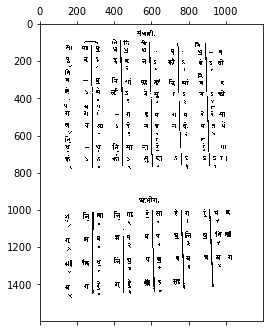

In [5]:
plt.matshow(bin_notes)

In [6]:
cv2.imwrite('binary_file.jpeg', bin_notes )

True

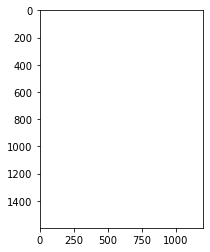

In [7]:
black = np.ones(bin_notes.shape)
plt.imshow(black)

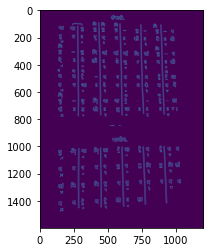

In [8]:
BinGray = cv2.Canny(bin_notes, 900, 100, 10)
plt.imshow( BinGray)

In [9]:
contours, hierarchy = cv2.findContours(BinGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

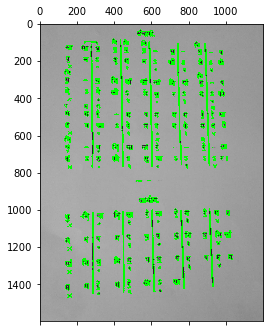

In [10]:
cv2.drawContours(notes, contours,-1, (0,255,0), 3)
plt.matshow(notes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


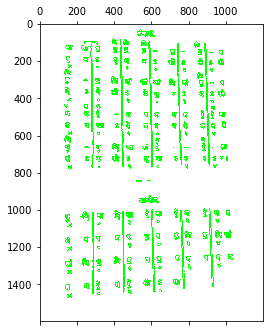

In [11]:
cv2.drawContours(black, contours,-1, (0,255,0), 3)
plt.matshow(black)

In [12]:
len(contours)

453

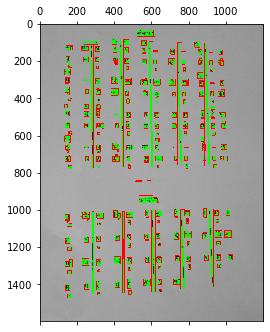

In [17]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(notes, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.matshow( notes)